# Decision Tree Algorithm
Decision trees can be applied to both regression and classification problems.
It is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
dummy_train_data = np.array([
    ['Green', 3, 'Apple'],
    ['Red', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
],dtype='O')
headers = ['color','diameter','fruit']

## CART(Classification and Regression Trees)

The representation for the CART model is a binary tree.

This is your binary tree from algorithms and data structures, nothing too fancy. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Given a dataset with two inputs (x) of height in centimeters and weight in kilograms the output of sex as male or female, below is a crude example of a binary decision tree (completely fictitious for demonstration purposes only).


                                        Is diameter >= 3 ?
                                                 |
                                    _____________|_____________
                               True|                           |False
                                   |                           |
                          Is color == Yellow ?               Grape
                                 |
                    _____________|_____________
               True|                           |False
                   |                           |
                  Lemon                      Apple

## Question(Partition concept of the dataset)

- like a `Threshold`
- Question is a concept for splitting the node.
- It represents a True or False question.
- match to see if it will go to true branch or false branch.

In [3]:

class Question:
    def __init__(self, column_index, value, header):
        self.column_index = column_index
        self.value = value
        self.header = header

    def match(self, example):
        if isinstance(example, list):
            example = np.array(example, dtype="O")
        val = example[self.column_index]

        # adding numpy int and float data types as well
        if isinstance(val, (int, float, np.int64, np.float64)):
            # a condition for question to return True or False for numeric value
            return float(val) >= float(self.value)
        else:
            return str(val) == str(self.value)  # categorical data comparison

    def __repr__(self):
        condition = "=="
        if isinstance(self.value, (int, float, np.int64, np.float64)):
            condition = ">="
        return f"Is {self.header} {condition} {self.value} ?"

In [4]:
q1 = Question(column_index=0,value='apple',header='fruit')
q1

Is fruit == apple ?

In [5]:
q1.match(['apple',10])

True

In [6]:
q2 = Question(column_index=1,value=30,header='weight')
q2

Is weight >= 30 ?

In [7]:
q2.match(['apple',10])

False

## Partition rows

- partition rows in true side and false side using the Question we have already defined.
- here fruit is the target and questions are used to divide the values of target
- first question here 'is the color red' 


                                    ['color','diameter','fruit']
                                    
                                     [['Green', 3, 'Apple'],
                                     ['Red', 3, 'Apple'],
                                     ['Red', 1, 'Grape'],
                                     ['Red', 1, 'Grape'],
                                     ['Yellow', 3, 'Lemon']]
                                    
                                        Is color == Red ?
                                                 |
                                    _____________|_____________
                               True|                           |False
                                   |                           |
                          [['Red', 3, 'Apple'],          [['Green', 3, 'Apple'],
                          ['Red', 1, 'Grape'],           ['Yellow', 3, 'Lemon']]
                          ['Red', 1, 'Grape']]               

In [8]:
def partition(rows, question):
    true_idx, false_idx = [], []
    for idx, row in enumerate(rows):
        if question.match(row):
            true_idx.append(idx)
        else:
            false_idx.append(idx)
    return true_idx, false_idx

In [9]:
dummy_train_data

array([['Green', 3, 'Apple'],
       ['Red', 3, 'Apple'],
       ['Red', 1, 'Grape'],
       ['Red', 1, 'Grape'],
       ['Yellow', 3, 'Lemon']], dtype=object)

In [10]:
Question(column_index=0,value='Red',header=headers[0])

Is color == Red ?

In [11]:
left, right = partition(dummy_train_data,Question(column_index=0,value='Red',header=headers[0]))

In [12]:
dummy_train_data[left,:]

array([['Red', 3, 'Apple'],
       ['Red', 1, 'Grape'],
       ['Red', 1, 'Grape']], dtype=object)

In [13]:
dummy_train_data[right,:]

array([['Green', 3, 'Apple'],
       ['Yellow', 3, 'Lemon']], dtype=object)

## Tree Node - Leaf node, Decision Node

                            Decision Node ->     Is diameter >= 3 ?
                                                         
                                                         |
                                            _____________|_____________
                                       True|                           |False
                                           |                           |
                   
                   Decision Node -> Is color == Yellow ?               Grape  <- Leaf Node 
                                         
                                         |
                            _____________|_____________
                       True|                           |False
                           |                           |
           
           Leaf Node ->  Lemon                      Apple


- Decision Node will have
    - a question
    - a true branch
    - a false branch
    - uncertainity value

- Leaf Node will have 
    - leaf value

In [14]:
class Node:
    def __init__(self, question=None, true_branch=None, false_branch=None, uncertainty=None, *, leaf_value=None):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.uncertainty = uncertainty
        self.leaf_value = leaf_value
    
    @property
    def _is_leaf_node(self):
        return self.leaf_value is not None


## Build Tree

- start recursion
  - find best split for the data (actually the question)
  - if gain == 0 then it is already a leaf node\
  - else get paritition based on the question's answer true_rows, false_rows 
  - build tree from true_rows and false_true and get Decision node with question, left and right branch

## Classification Tree
### Gini Impurity

Used by the CART (classification and regression tree) algorithm for classification trees, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability $p_{i}$ of an item with label i being chosen times the probability 

$\sum_{k \neq i}{p_k} = 1 - {p_i}$

of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

\begin{align*}
    {I_G(p)} =& {\sum_{i=1}^{J}{(p_i\sum_{k \neq i}p_k)}}\\
             =& {\sum_{i=1}^{J}p_i(1 - p_i)}\\
             =& {\sum_{i=1}^{J}(p_i - p_i^2)}\\
             =& {\sum_{i=1}^{J}p_i - \sum_{i=1}^{J}p_i^2}\\
    {I_G(p)} =& {1 - \sum_{i=1}^{J}p_i^2} 
\end{align*}



In [20]:
def gini_impurity(arr):
    classes, counts = np.unique(arr, return_counts=True)
    gini_score = 1 - np.square(counts / arr.shape[0]).sum(axis=0)
    return gini_score

In [21]:
print(gini_impurity(np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])))

0.4970414201183432


In [22]:
print(gini_impurity(np.array(['apple','apple','apple','apple'])))

0.0


In [23]:
print(gini_impurity(np.array(['apple','apple','apple','orange'])))

0.375


In [24]:
print(gini_impurity(np.array(['apple','apple','apple','orange','orange','orange'])))

0.5


### Entropy

- information theory concept to calculate uncertainity in the data

$H(T) = I_E(P) = - {\Sigma_{i=1}^{J}{p_i}log_2{p_i}}$

In [25]:
def entropy(arr):
    classes, counts = np.unique(arr, return_counts=True)
    p = counts / arr.shape[0]
    entropy_score = (-p * np.log2(p)).sum(axis=0)
    return entropy_score

In [26]:
print(entropy(np.array([0,0,0,0,0,0,0,1,1,1,1,1,1])))

0.9957274520849255


In [27]:
print(entropy(np.array(['apple','apple','apple','apple'])))

0.0


In [28]:
print(entropy(np.array(['apple','apple','apple','orange'])))

0.8112781244591328


In [29]:
print(entropy(np.array(['apple','apple','apple','orange','orange','orange'])))

1.0


### Information Gain

Information gain is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees. Information gain is calculated by comparing the entropy of the dataset before and after a transformation.

Inforgation Gain = H(Before splitting) - H(After splitting)

In [30]:
def info_gain(left, right, parent_uncertainty):

    pr = left.shape[0] / (left.shape[0] + right.shape[0])

    child_uncertainty = pr * \
        gini_impurity(left) - (1 - pr) * gini_impurity(right)

    info_gain_value = parent_uncertainty - child_uncertainty
    return info_gain_value

In [31]:
headers,dummy_train_data

(['color', 'diameter', 'fruit'],
 array([['Green', 3, 'Apple'],
        ['Red', 3, 'Apple'],
        ['Red', 1, 'Grape'],
        ['Red', 1, 'Grape'],
        ['Yellow', 3, 'Lemon']], dtype=object))

In [32]:
curr_uncert = gini_impurity(dummy_train_data[:,-1])
curr_uncert

0.6399999999999999

In [33]:
ti , fi = partition(dummy_train_data,Question(0,'Green',headers[0]))

In [34]:
ts = dummy_train_data[ti,:]
ts

array([['Green', 3, 'Apple']], dtype=object)

In [35]:
fs = dummy_train_data[fi,:]
fs

array([['Red', 3, 'Apple'],
       ['Red', 1, 'Grape'],
       ['Red', 1, 'Grape'],
       ['Yellow', 3, 'Lemon']], dtype=object)

In [36]:
info_gain(ts[:,-1],fs[:,-1],curr_uncert)

1.14

### Find best split in all options

- based on the max information gain. find the best split 
- here based on the values of X, y is divided into true and false branch
- before the split and after the split wherever we find maximum information gain we will take it as the best split
- some artifacts like best question, best gain and parent_uncertainity are kept

In [37]:
def find_best_split(X, y):
    max_gain = -1
    best_split_question = None

    parent_uncertainty = gini_impurity(y)

    m_samples, n_labels = X.shape

    for col_index in range(n_labels):  # iterate over feature columns
        # get unique values from the feature
        unique_values = np.unique(X[:, col_index])
        for val in unique_values:  # check for every value and find maximum info gain

            ques = Question(
                column_index=col_index,
                value=val,
                header=headers[col_index]
            )

            t_idx, f_idx = partition(X, ques)
            # if it does not split the data
            # skip it
            if len(t_idx) == 0 or len(f_idx) == 0:
                continue

            true_y = y[t_idx, :]
            false_y = y[f_idx, :]

            gain = info_gain(true_y, false_y, parent_uncertainty)
            if gain > max_gain:
                max_gain, best_split_question = gain, ques

    return max_gain, best_split_question, parent_uncertainty          

In [38]:
find_best_split(dummy_train_data[:,:-1],dummy_train_data[:,[-1]])

(1.14, Is color == Green ?, 0.6399999999999999)

### Classification/ Prediction

- traverse the tree and use the question to match and classify

### Creating a Classification Model


https://mightypy.readthedocs.io/en/main/api/mightypy.ml.html

In [40]:
from mightypy.ml import DecisionTreeClassifier

### Testing with Data

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dataset = load_iris()

X = dataset.data
y = dataset.target
feature_name = dataset.feature_names
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.05)

In [64]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
dt.train(X=X_train,y=y_train,feature_name=feature_name)
dt.print_tree()

|-Is sepal length (cm) >= 7.9 ? | gini :0.6665344177742512
|---> True:
  |--  Predict : {2: 1}
|---> False:
  |--Is sepal width (cm) >= 4.4 ? | gini :0.6665660681052261
  |----> True:
    |---  Predict : {0: 1}
  |----> False:
    |---Is sepal width (cm) >= 4.2 ? | gini :0.6666326530612245
    |-----> True:
      |----  Predict : {0: 1}
    |-----> False:
      |----Is sepal width (cm) >= 4.1 ? | gini :0.6666321618963822
      |------> True:
        |-----  Predict : {0: 1}
      |------> False:
        |-----Is sepal width (cm) >= 4.0 ? | gini :0.6665616467128754
        |-------> True:
          |------  Predict : {0: 1}
        |-------> False:
          |------Is petal length (cm) >= 6.7 ? | gini :0.6664180297298737
          |--------> True:
            |-------  Predict : {2: 2}
          |--------> False:
            |-------Is sepal length (cm) >= 7.7 ? | gini :0.666556927297668
            |---------> True:
              |--------  Predict : {2: 1}
            |---------> Fals

In [66]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.train(X=X_train,y=y_train,feature_name=feature_name)

y_pred = dt.predict(X_test)

pd.DataFrame(np.c_[y_test.reshape(-1,1),y_pred], columns=['original','predicted'])

,original,predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2


In [67]:
y_pred = dt.predict_probability(X_test)
pd.DataFrame(np.c_[y_test.reshape(-1,1),y_pred], columns=['original','predicted'])

,original,predicted
0,1,{1: 100.0}
1,0,{0: 100.0}
2,2,{2: 100.0}
3,1,{1: 100.0}
4,1,{2: 100.0}
5,0,{0: 100.0}
6,1,{1: 100.0}
7,2,"{1: 50.0, 2: 50.0}"


## Regression Tree

### Variance Reduction

- similar to classification we need an information gain medium before and after splitting node.
- here variance of parent is subtracted from variance of child components(pr(percentage weight) * var).

### Find best split in all options

- based on the max information gain. find the best split 
- here based on the values of X, y is divided into true and false branch
- before the split and after the split wherever we find maximum information gain we will take it as the best split
- some artifacts like best question, best gain and parent_uncertainity are kept

### Creating a Regression Model


https://mightypy.readthedocs.io/en/main/api/mightypy.ml.html

In [53]:
from mightypy.ml import DecisionTreeRegressor

### Testing with Data

In [68]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [93]:
X, y = make_regression(n_samples=500, n_features=4, random_state=2222)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=2222, test_size=0.10)

dt = DecisionTreeRegressor(max_depth=300, min_samples_split=3)
dt.train(X=X_train,y=y_train)

y_pred = dt.predict(X_test)
df = pd.DataFrame(np.c_[y_test.reshape(-1,1),y_pred],columns=['original','predicted'])

Mean Squared Error : 8162.831645444925


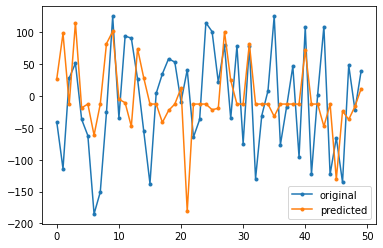

In [94]:
print("Mean Squared Error :", mean_squared_error(df['original'],df['predicted']))
plt.plot(df['original'], '.-', label='original')
plt.plot(df['predicted'], '.-',label='predicted')
plt.legend()
plt.show()